<a href="https://colab.research.google.com/github/Arifuzzaman-Swapnil/assignment-1/blob/main/Used_Car_Price_Prediction(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Price Predection**

### **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from google.colab import drive

### **Load Dataset**

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/used_cars_Pakistan.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.head())
print('\n\n')
print(data.tail())

   Unnamed: 0    make  model    city  year  mileage  Engine_displacement  \
0           0  Suzuki   Alto  Lahore  2019    45744                660.0   
1           1  Suzuki  Wagon  Lahore  2019    17583                660.0   
2           2  Suzuki  Wagon  Lahore  2019    64085                660.0   
3           3  Suzuki  Wagon  Lahore  2019    71281                660.0   
4           4  Toyota   Aqua  Lahore  2020    19950               1500.0   

   Battery  Price_Rs  
0      NaN   3550000  
1      NaN   3850000  
2      NaN   3890000  
3      NaN   3990000  
4      NaN   3990000  



       Unnamed: 0    make   model        city  year  mileage  \
86115       86115  Suzuki   Bolan  Rawalpindi  2011    60000   
86116       86116  Toyota   Hiace      Lahore  2009   300000   
86117       86117  Suzuki   Bolan   Islamabad  2017    44740   
86118       86118  Toyota   Passo     Karachi  2010    94890   
86119       86119  Suzuki  Cultus      Lahore  2008    60800   

       Engine_dis

## **Data Preprocessing**

### **Drop unnecessary columns**

In [ ]:
# data = data.drop(columns=["Unnamed: 0"])

### **Missing Values Handling**

In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 86120
Number of attributes = 9
Number of missing values:
	Unnamed: 0: 0
	make: 0
	model: 0
	city: 0
	year: 0
	mileage: 0
	Engine_displacement: 189
	Battery: 85931
	Price_Rs: 0


In [ ]:
data = data.drop('Battery', axis=1)
print(data.isnull().sum())

Unnamed: 0               0
make                     0
model                    0
city                     0
year                     0
mileage                  0
Engine_displacement    189
Price_Rs                 0
dtype: int64


**Fill missing values in numerical columns**

In [ ]:
data=data.dropna()
data.isnull().sum()

,0
Unnamed: 0,0
make,0
model,0
city,0
year,0
mileage,0
Engine_displacement,0
Price_Rs,0


**Recheck for if there any missing values is still exit**

In [ ]:
print(data.isnull().sum())

Unnamed: 0             0
make                   0
model                  0
city                   0
year                   0
mileage                0
Engine_displacement    0
Price_Rs               0
dtype: int64


In [ ]:
data.shape

(85931, 8)

### **Duplicate Data Handeling**

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 85931
Number of rows after discarding duplicates = 85931


### **Lebel Encoding**

In [ ]:
print(data.dtypes)

Unnamed: 0               int64
make                    object
model                   object
city                    object
year                     int64
mileage                  int64
Engine_displacement    float64
Price_Rs                 int64
dtype: object


In [ ]:
categorical_features = ['make', 'model', 'city']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

### **EDA**

In [ ]:
data.describe()

,Unnamed: 0,make,model,city,year,mileage,Engine_displacement,Price_Rs
count,85931.000000,85931.000000,85931.000000,85931.000000,85931.000000,85931.000000,85931.000000,8.593100e+04
mean,43081.729341,48.127986,179.001234,159.452433,2012.651872,88953.470983,1388.138146,4.108393e+06
std,24860.057301,16.516866,109.665255,66.132381,8.862414,87953.567833,766.087270,9.538736e+06
min,0.000000,0.000000,0.000000,0.000000,1944.000000,1.000000,0.000000,-2.147484e+09
25%,21567.500000,28.000000,105.000000,108.000000,2007.000000,31000.000000,1000.000000,1.500000e+06
50%,43096.000000,60.000000,128.000000,151.000000,2015.000000,78000.000000,1300.000000,2.800000e+06
75%,64610.500000,61.000000,242.000000,196.000000,2019.000000,121000.000000,1600.000000,4.750000e+06
max,86119.000000,66.000000,422.000000,320.000000,2023.000000,1000000.000000,15000.000000,3.015000e+08


### **Quartile**

0        3550000
1        3850000
2        3890000
3        3990000
4        3990000
          ...   
86115     985000
86116    3200000
86117    1750000
86118    2300000
86119     990000
Name: Price_Rs, Length: 85931, dtype: int64


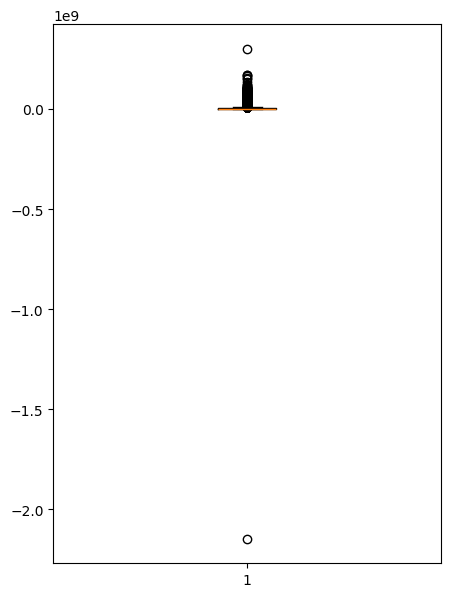

In [ ]:
#creating dataset
np.random.seed(10)
Data=data["Price_Rs"]
print(Data)
fig = plt.figure(figsize=(5, 7))

#creating plot
plt.boxplot(Data)

#show plot
plt.show()

### **Calculate The Correlation**

In [ ]:
data.corr()

,Unnamed: 0,make,model,city,year,mileage,Engine_displacement,Price_Rs
Unnamed: 0,1.000000,0.031119,-0.016328,0.013360,-0.118084,0.056570,-0.082766,-0.060160
make,0.031119,1.000000,0.122156,0.015138,-0.063302,0.028280,-0.028676,-0.012728
model,-0.016328,0.122156,1.000000,-0.003044,0.057276,-0.055518,0.020007,0.039668
city,0.013360,0.015138,-0.003044,1.000000,-0.025315,0.001088,-0.023306,-0.017541
year,-0.118084,-0.063302,0.057276,-0.025315,1.000000,-0.410848,-0.061961,0.193494
mileage,0.056570,0.028280,-0.055518,0.001088,-0.410848,1.000000,0.023488,-0.121709
Engine_displacement,-0.082766,-0.028676,0.020007,-0.023306,-0.061961,0.023488,1.000000,0.315577
Price_Rs,-0.060160,-0.012728,0.039668,-0.017541,0.193494,-0.121709,0.315577,1.000000


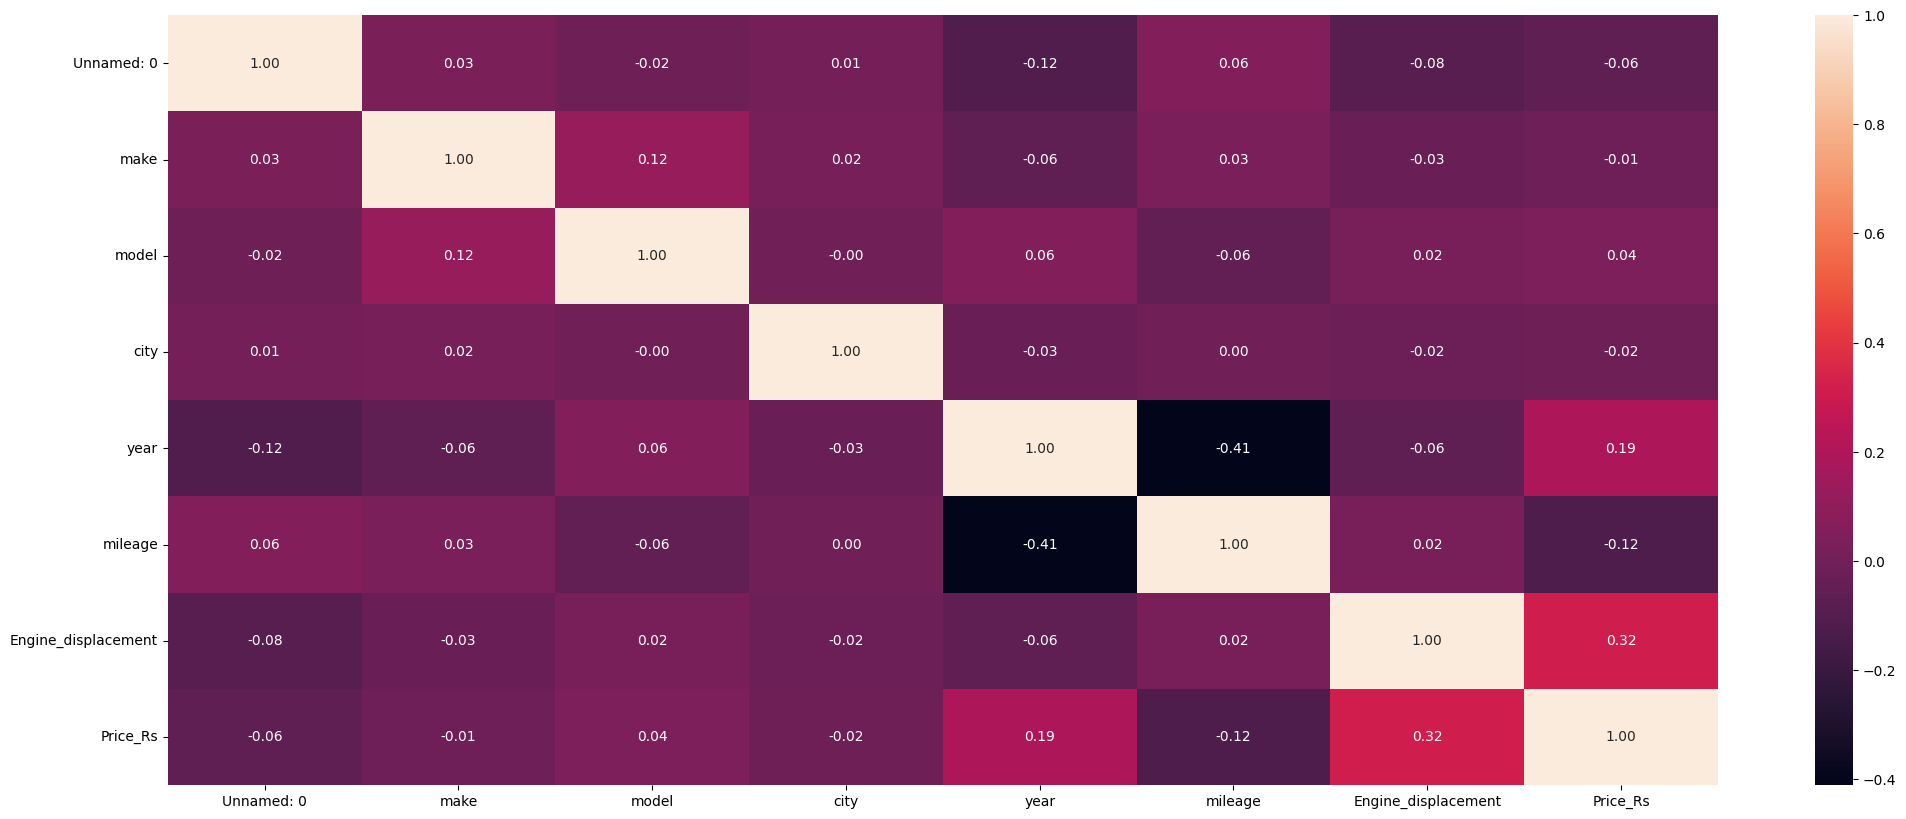

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

### **Feature Engineering**

In [ ]:
#Create a derived feature: car age

In [ ]:
current_year = 2024
data['car_age'] = current_year - data['year']
data = data.drop(columns=['year'])

## **Split Data into Training and Testing Sets**

In [ ]:
X = data.drop(columns=['Price_Rs'])
Y = data['Price_Rs']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## **Define a function for model evaluation**


### **linear regression**

In [ ]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
print("Linear Regression Model\n")

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")


# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

# Printing the results
print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Linear Regression Model

	Training Data Evaluation:
		MAE: 1965038.17755987
		MSE: 23882043781609.082
		RMSE: 4886925.800706318
		R²: 35.078740553578115

	Testing Data Evaluation:
		MAE: 2254005.472284092
		MSE: 560562261327723.2
		RMSE: 23676196.09075164
		R²: 3.1361861694119475


**Visualize the actual prices and Predicted prices**

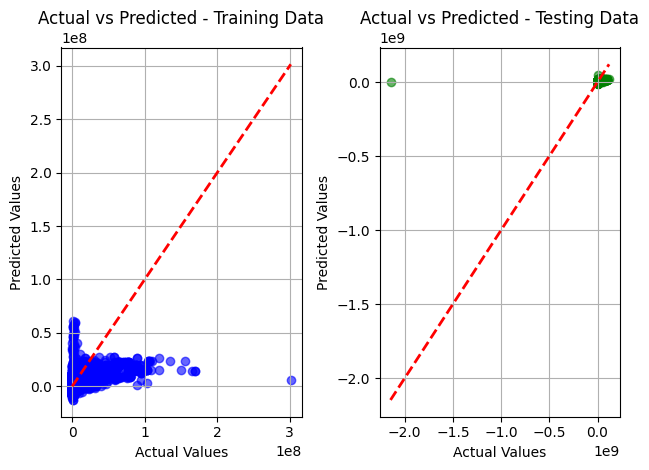

In [ ]:
# Scatter plot for Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Scatter plot for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

### **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)
print("Lasso Regression -\n")
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Lasso Regression -

	Training Data Evaluation:
		MAE: 1965038.17755987
		MSE: 23882043781609.082
		RMSE: 4886925.800706318
		R²: 35.078740553578115

	Testing Data Evaluation:
		MAE: 2254005.472284092
		MSE: 560562261327723.2
		RMSE: 23676196.09075164
		R²: 3.1361861694119475


**Visualize the actual prices and Predicted prices**

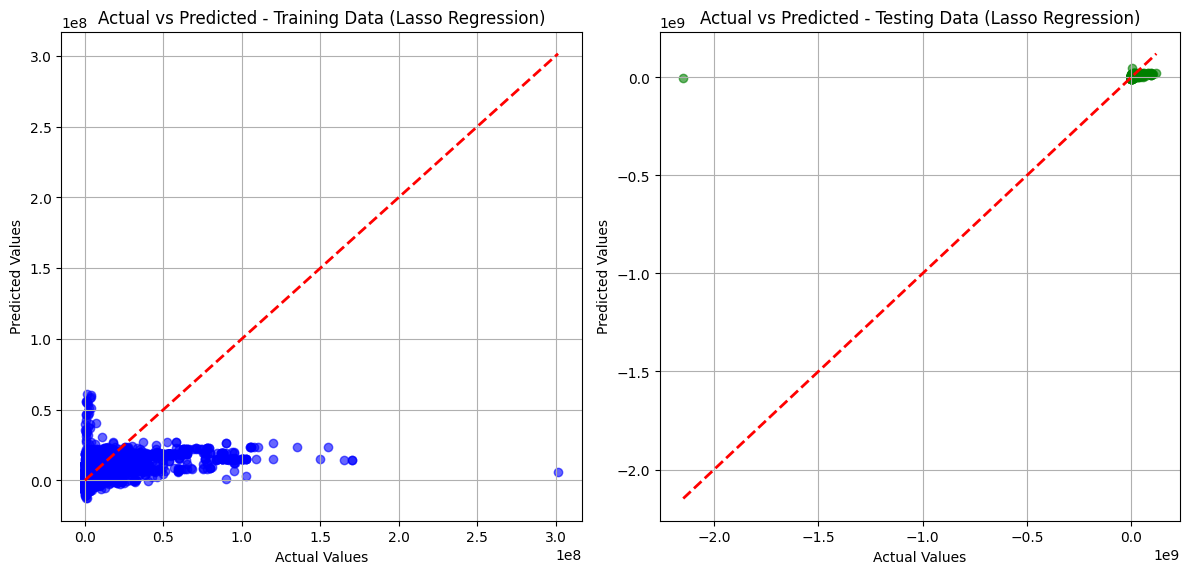

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting Actual vs Predicted for Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data (Lasso Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data (Lasso Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()


### **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Creating and training the Random Forest Regression model
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# Making predictions
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)


print("Random Forest Regression\n")
# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Random Forest Regression

	Training Data Evaluation:
		MAE: 205410.9094944205
		MSE: 1033018920074.3988
		RMSE: 1016375.3834457025
		R²: 97.1918278880781

	Testing Data Evaluation:
		MAE: 823514.0829881312
		MSE: 544624925840222.2
		RMSE: 23337200.47135522
		R²: 5.8901195040614525


**Visualize the actual prices and Predicted prices**

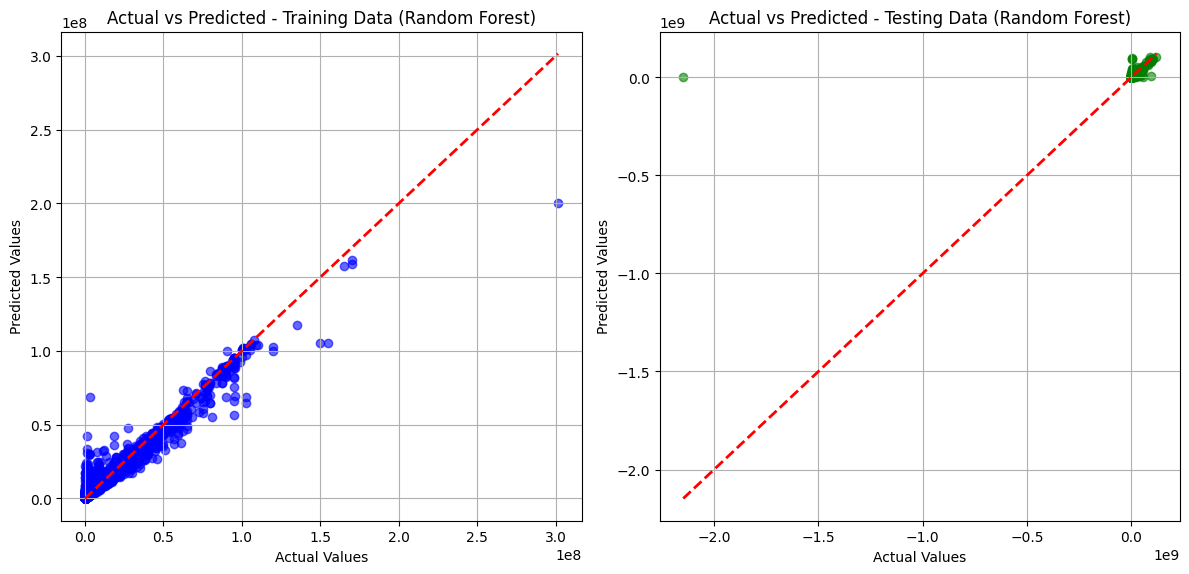

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data (Random Forest)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data (Random Forest)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

### **XGBoost Regression**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Creating and training the XGBoost Regression model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=2)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [ ]:
# Making predictions
Y_train_pred = xgb.predict(X_train)
Y_test_pred = xgb.predict(X_test)

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

print("XGBoost Regression-\n")

# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

XGBoost Regression-

	Training Data Evaluation:
		MAE: 594348.2745871585
		MSE: 4154467618275.0923
		RMSE: 2038251.1175699357
		R²: 88.70643973350525

	Testing Data Evaluation:
		MAE: 924987.3245373771
		MSE: 544816971384906.1
		RMSE: 23341314.688442595
		R²: 5.856943130493164


**Visualization Code**

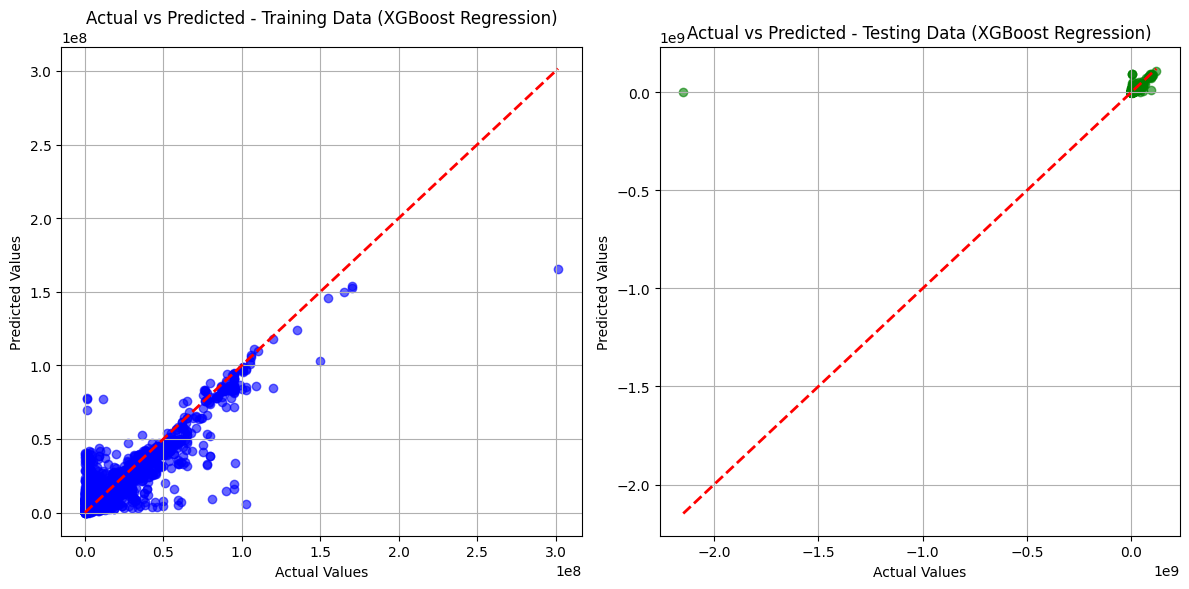

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data (XGBoost Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data (XGBoost Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

### **Robust Regression (RANSAC)**

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling - RANSAC can be sensitive to the scale of features, so we scale them
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scaling the features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

# Creating and training the RANSAC model
ransac = RANSACRegressor(random_state=2)
ransac.fit(X_train_scaled, Y_train_scaled.ravel())  # Use ravel to convert target to 1D

# Making predictions
Y_train_pred_scaled = ransac.predict(X_train_scaled)
Y_test_pred_scaled = ransac.predict(X_test_scaled)

# Inverse transform the scaled predictions to get them back to the original scale
Y_train_pred = scaler_Y.inverse_transform(Y_train_pred_scaled.reshape(-1, 1))
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled.reshape(-1, 1))

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)


# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("Robust Regression (RANSAC) -\n")

# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Robust Regression (RANSAC) -

	Training Data Evaluation:
		MAE: 1686006.245370279
		MSE: 25944819172977.96
		RMSE: 5093605.714322415
		R²: 29.47126501306846

	Testing Data Evaluation:
		MAE: 2007533.931877266
		MSE: 563781609223553.4
		RMSE: 23744085.773589037
		R²: 2.579890577020516


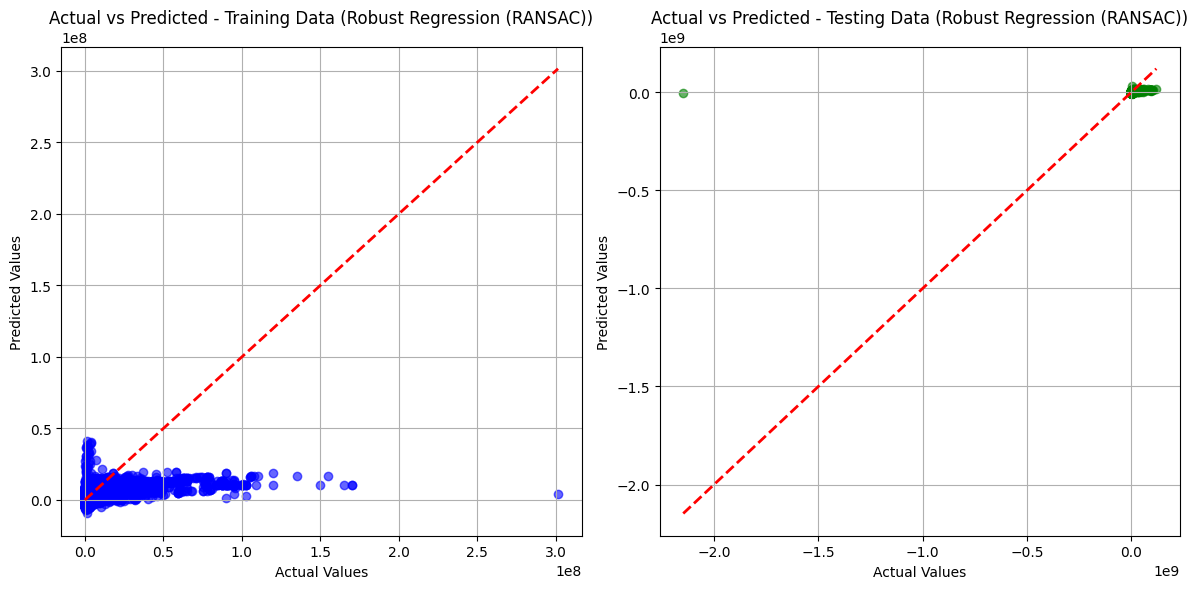

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data (Robust Regression (RANSAC))")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data (Robust Regression (RANSAC))")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

### **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Feature Scaling - Polynomial Regression can benefit from scaling the features
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scaling the features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

# Create Polynomial features (degree can be changed based on the need)
degree = 3  # You can tune this value
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and train the linear regression model on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train_scaled)

# Making predictions
Y_train_pred_scaled = lin_reg.predict(X_train_poly)
Y_test_pred_scaled = lin_reg.predict(X_test_poly)

# Inverse transform the scaled predictions to get them back to the original scale
Y_train_pred = scaler_Y.inverse_transform(Y_train_pred_scaled.reshape(-1, 1))
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled.reshape(-1, 1))

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Polynomial Regression (Degree {degree})-\n")
# Printing the results
print(f"\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")


Polynomial Regression (Degree 3)-

	Training Data Evaluation:
		MAE: 1464869.2737800253
		MSE: 16387711986807.232
		RMSE: 4048173.9076782796
		R²: 55.45142989612809

	Testing Data Evaluation:
		MAE: 1751257.5630865742
		MSE: 555083008963493.06
		RMSE: 23560199.68004289
		R²: 4.082987831875817


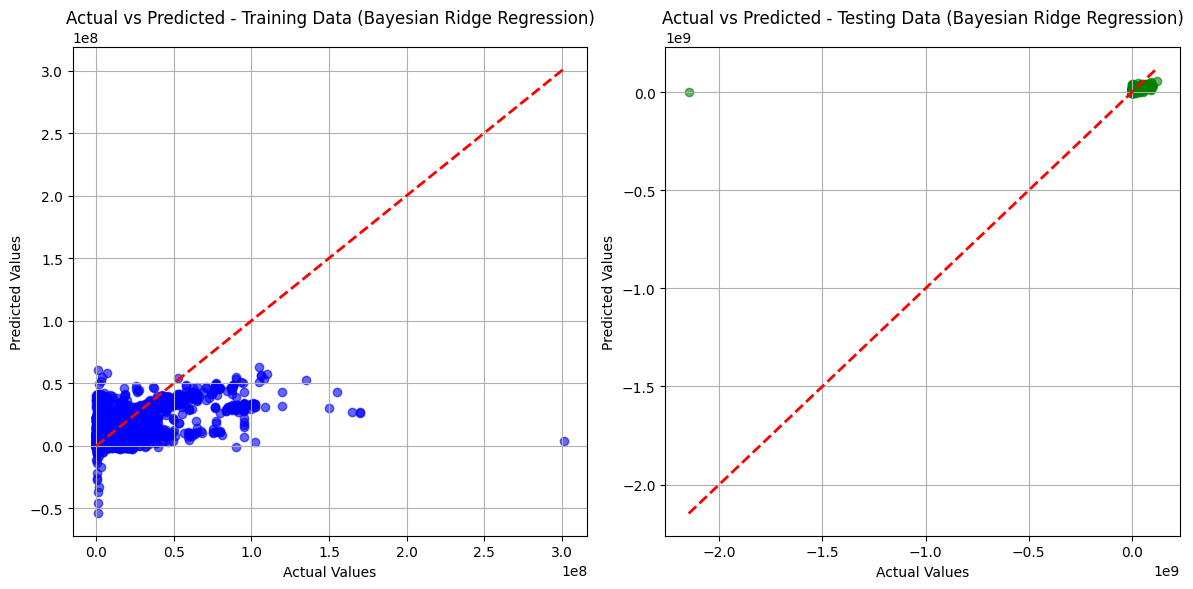

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

### **Bayesian Ridge Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Feature Scaling - Bayesian Ridge Regression can benefit from scaling the features
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scaling the features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

# Create and train the Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, Y_train_scaled.ravel())

# Making predictions
Y_train_pred_scaled = bayesian_ridge.predict(X_train_scaled)
Y_test_pred_scaled = bayesian_ridge.predict(X_test_scaled)

# Inverse transform the scaled predictions to get them back to the original scale
Y_train_pred = scaler_Y.inverse_transform(Y_train_pred_scaled.reshape(-1, 1))
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled.reshape(-1, 1))

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Bayesian Ridge Regression-\n")
# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Bayesian Ridge Regression-

	Training Data Evaluation:
		MAE: 1964892.342253033
		MSE: 23882044168260.867
		RMSE: 4886925.840266135
		R²: 35.07873950249885

	Testing Data Evaluation:
		MAE: 2253868.735054172
		MSE: 560563250922325.5
		RMSE: 23676216.989255812
		R²: 3.136015169838957


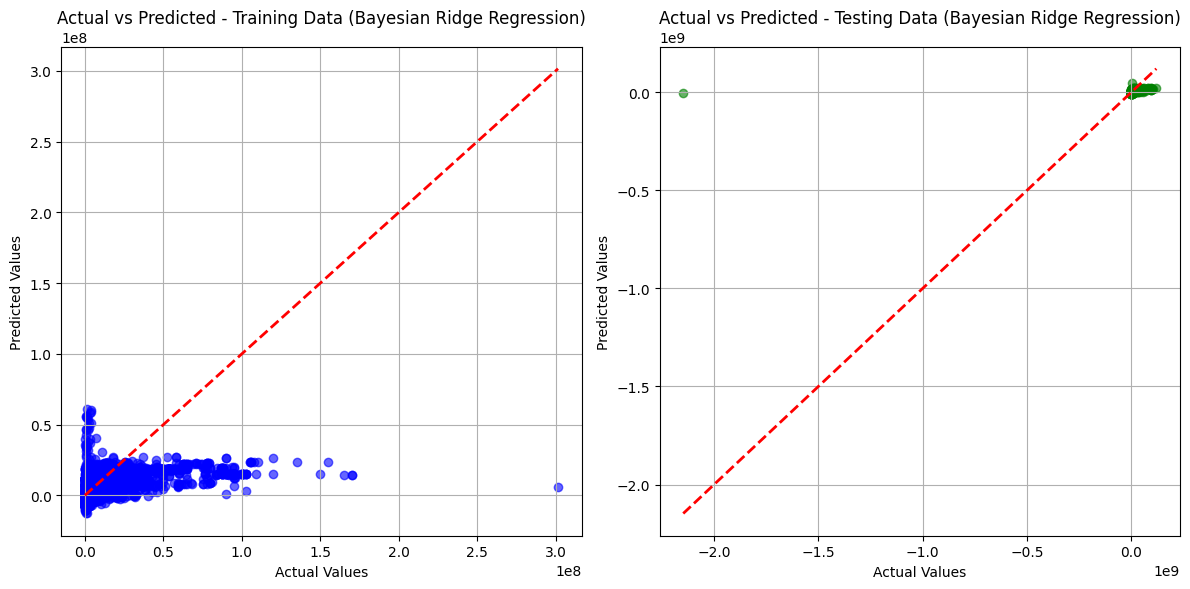

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Training Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - Testing Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

## **Determine the Best Model and fine tuinning**

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
# Adding the intercept term
x = np.column_stack((np.ones(X.shape[0]), X))

In [ ]:
# Calculate the coefficients (beta)
beta = np.linalg.inv(x.T @ x) @ x.T @ Y

In [ ]:
# Calculate the predictions
y_pred = x @ beta

In [ ]:
# Calculate residuals
residuals = Y - y_pred


In [ ]:
# Calculate the variance and standard error
sigma_squared = np.sum(residuals**2) / (len(Y) - 2)
standard_error = np.sqrt(np.diagonal(sigma_squared * np.linalg.inv(x.T @ x)))

In [ ]:
# Calculate t-statistics
t_stats = beta / standard_error


In [ ]:
# Calculate p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), len(Y) - 2)) for t in t_stats]

In [ ]:
# Print the results
print("Coefficients:", beta)
print("P-values:", p_values)

Coefficients: [ 9.87142073e+05 -2.86314367e+00  4.79435369e+03  1.58504183e+03
 -7.15167024e+02 -5.34812853e+00  4.08117630e+03 -2.06671392e+05]
P-values: [3.75770525806729e-11, 0.01916775795543879, 0.009132799444546702, 1.0413150342003519e-08, 0.11568976473283188, 0.0, 0.0, 0.0]


# **P_ Value for Random forest Regression.**

## **Permutation Importance**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitting the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Permutation importance
perm_importance = permutation_importance(rf, X_test, Y_test, n_repeats=30, random_state=42)

# Display feature importance and approximate p-values
feature_importances = perm_importance.importances_mean
p_values = [1.0 if imp <= 0 else (sum(perm_importance.importances[i] <= 0) / len(perm_importance.importances[i]))
            for i, imp in enumerate(perm_importance.importances_mean)]

results = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances,
    "P-value Approximation": p_values
}).sort_values(by="Importance", ascending=False)

print(results)


               Feature  Importance  P-value Approximation
5  Engine_displacement    1.528172               0.000000
6              car_age    1.384778               0.000000
1                 make    0.488741               0.000000
2                model    0.372284               0.000000
0           Unnamed: 0    0.350836               0.466667
4              mileage    0.084517               0.000000
3                 city    0.015252               0.000000


## Statistical Tests for Feature Importance

In [ ]:
from scipy.stats import pearsonr

# Compute correlation and p-values for each feature
feature_p_values = []
for feature in X.columns:
    corr, p_value = pearsonr(X[feature], Y)
    feature_p_values.append((feature, corr, p_value))

# Display results
p_value_df = pd.DataFrame(feature_p_values, columns=["Feature", "Correlation", "P-value"])
print(p_value_df.sort_values(by="P-value"))


               Feature  Correlation        P-value
5  Engine_displacement     0.315577   0.000000e+00
6              car_age    -0.193494   0.000000e+00
4              mileage    -0.121709  7.580938e-281
0           Unnamed: 0    -0.060160   1.001529e-69
2                model     0.039668   2.815491e-31
3                 city    -0.017541   2.712351e-07
1                 make    -0.012728   1.905304e-04


## SHAP (SHapley Additive exPlanations)